In [56]:
import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from IPython.display import display

In [2]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

In [3]:
### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )

In [4]:
import pprint 
#pprint.pprint(data_dict)
pprint.pprint(data_dict['TOTAL'])

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}


In [5]:
data_dict.pop('TOTAL',0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [68]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
#feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
#features_list = [poi, feature_1, feature_2, feature_3]

In [69]:
import numpy as np
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})


In [72]:
data = featureFormat(data_dict, features_list )
print data[:5]

[[ 0.000  365788.000  0.000]
 [ 0.000  267102.000  6680544.000]
 [ 0.000  170941.000  4890344.000]
 [ 0.000  0.000  651850.000]
 [ 1.000  243293.000  5538001.000]]


In [71]:
poi, finance_features = targetFeatureSplit( data )

In [73]:
pprint.pprint(finance_features[:5])
pprint.pprint(poi[:5])

[array([ 365788.000,  0.000]),
 array([ 267102.000,  6680544.000]),
 array([ 170941.000,  4890344.000]),
 array([ 0.000,  651850.000]),
 array([ 243293.000,  5538001.000])]
[0.0, 0.0, 0.0, 0.0, 1.0]


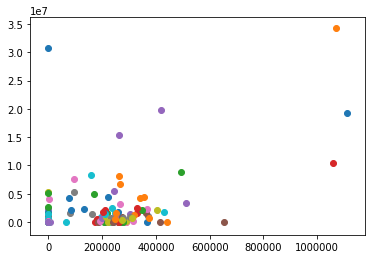

In [15]:
### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2, _ in finance_features:
    plt.scatter( f1, f2 )
plt.show()

In [74]:
from sklearn.cluster import KMeans
kclf = KMeans(n_clusters=2)
kclf.fit(finance_features)
pred = kclf.predict(finance_features)
pprint.pprint(finance_features[:5])
pprint.pprint(pred[:10])
pprint.pprint(poi[:10])

[array([ 365788.000,  0.000]),
 array([ 267102.000,  6680544.000]),
 array([ 170941.000,  4890344.000]),
 array([ 0.000,  651850.000]),
 array([ 243293.000,  5538001.000])]
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]


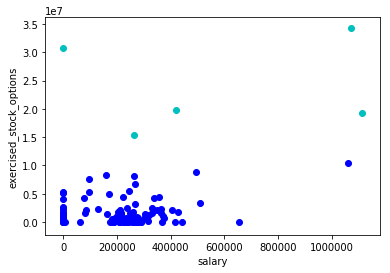

In [75]:
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"

In [58]:
import pandas as pd

data_raw = pd.DataFrame.from_dict({(i):data_dict[i]
                                   for i in data_dict.keys()}, orient="index").astype({'exercised_stock_options':float,
                                                                                      'salary':float})

# data_raw =pd.DataFrame.from_dict(data_dict, orient="index")

display(data_raw.head())
print data_raw.dtypes

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955.0,2902,2869717,4484442,1729541.0,4175000,126027,1407,-126027,1729541,...,NaN,2195,152,65,False,NaN,-3081055,304805,phillip.allen@enron.com,47
BADUM JAMES P,NaN,NaN,178980,182466,257817.0,NaN,NaN,NaN,NaN,257817,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477.0,566,NaN,916197,4046157.0,NaN,1757552,465,-560222,5243487,...,NaN,29,864523,0,False,NaN,-5104,NaN,james.bannantine@enron.com,39
BAXTER JOHN C,267102.0,NaN,1295738,5634343,6680544.0,1200000,3942714,NaN,NaN,10623258,...,NaN,NaN,2660303,NaN,False,NaN,-1386055,1586055,NaN,NaN
BAY FRANKLIN R,239671.0,NaN,260455,827696,NaN,400000,145796,NaN,-82782,63014,...,NaN,NaN,69,NaN,False,NaN,-201641,NaN,frank.bay@enron.com,NaN


salary                       float64
to_messages                   object
deferral_payments             object
total_payments                object
exercised_stock_options      float64
bonus                         object
restricted_stock              object
shared_receipt_with_poi       object
restricted_stock_deferred     object
total_stock_value             object
expenses                      object
loan_advances                 object
from_messages                 object
other                         object
from_this_person_to_poi       object
poi                             bool
director_fees                 object
deferred_income               object
long_term_incentive           object
email_address                 object
from_poi_to_this_person       object
dtype: object


In [62]:
for i in list(['exercised_stock_options', 'salary']):
    print "{}".format(i)
    print "maximum value: {}".format(data_raw[i].max(skipna=True))
    print "minimum value: {}".format(data_raw[i].min(skipna=True))
    print pd.isnull(data_raw[i]).any()

exercised_stock_options
maximum value: 34348384.0
minimum value: 3285.0
True
salary
maximum value: 1111258.0
minimum value: 477.0
True


In [46]:
for ii, pp in enumerate(pred[:5]):
    print ii,pp

0 1
1 1
2 1
3 1
4 1
